In [2]:
# base
import matplotlib.pyplot as plt
import json
from const import *
def read_json(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data

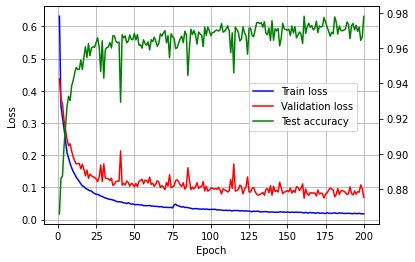

In [34]:
# resnet+hd+mnist: overfit
file_path = "result/large/resnet_MNIST_hypergradient_debug_1.json"
data = read_json(file_path)
train_loss = data[TRAINLOSS]
val_loss = data[VALLOSS]
accu = data[ACCU]
epochs = [i + 1 for i in range(len(train_loss))]

fig, axs = plt.subplots()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.plot(epochs,accu)
# plt.scatter(epochs, train_loss, c=epochs, cmap="hot", label="Train loss", s=2)
plots = []
plots.append(plt.plot(epochs, train_loss, c="b", label="Train loss"))
plots.append(plt.plot(epochs, val_loss, c="r", label="Validation loss"))
# plt.legend(fontsize=10)
plt.twinx()
plots.append(plt.plot(epochs, accu, c="g", label="Test accuracy"))
fig.legend(fontsize=10, loc=(120/200, 1/2))

plt.show()
